# Project

## Data Cleaning and Imputation

We begin by loading the dataset, and showing a few of the matches to prove the data has been loaded.

In [3]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head(5)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


### Missing Stances and Referee

Some of the matches feature fighters with missing stance information or missing referee information. Since this is a relatively small number of matches out of the whole dataset, we will drop these matches from our consideration.

In [4]:
# Show number of matches in dataset before removing matches with missing stance information
print('Number of matches prior to filtering: ' + str(len(df)))

# Remove matches with missing stance information
filter1 = df[df['B_Stance'].notnull()]
filter2 = filter1[filter1['R_Stance'].notnull()]
filter3 = filter2[filter2['Referee'].notnull()]
df = filter3
print('Number of matchs after filtering: ' + str(len(filter3)))

Number of matches prior to filtering: 5144
Number of matchs after filtering: 4865


### Missing Numerical Data

Many of the rows contain missing numerical data in certain columns. We will fill in these columns with the median for that column.

First we will find columns with missing numerical data to demonstrate that our imputation is successful.

In [5]:
df.columns[df.isnull().any()]

Index(['B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_CLINCH_att',
       'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed',
       'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_HEAD_att',
       'B_avg_HEAD_landed',
       ...
       'R_avg_opp_SUB_ATT', 'R_avg_opp_TD_att', 'R_avg_opp_TD_landed',
       'R_avg_opp_TD_pct', 'R_avg_opp_TOTAL_STR_att',
       'R_avg_opp_TOTAL_STR_landed', 'R_total_time_fought(seconds)',
       'R_Reach_cms', 'B_age', 'R_age'],
      dtype='object', length=104)

We select R_age for our demonstration. Now we find a few rows that have a missing R_age.

In [6]:
people = df[df['R_age'].isnull()].head(5)
people

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4171,Per Eklund,Samy Schiavo,Leon Roberts,2008-10-18,"Birmingham, England, United Kingdom",Red,False,Lightweight,3,1.0,...,0.0,0.0,0.0,0.0,Orthodox,177.80,182.88,155.0,32.0,NaN
4376,Jess Liaudin,Anthony Torres,Mario Yamasaki,2007-09-08,"London, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,1.0,0.0,1.0,Orthodox,175.26,182.88,170.0,29.0,NaN
4438,Jess Liaudin,Dennis Siver,Steve Mazzagatti,2007-04-21,"Manchester, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,175.26,182.88,170.0,28.0,NaN
4767,Keith Rockel,Chris Liguori,John McCarthy,2003-11-21,"Uncasville, Connecticut, USA",Red,False,Middleweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,182.88,NaN,185.0,NaN,NaN
4908,Ben Earwood,Chris Lytle,Mario Yamasaki,2000-11-17,"Atlantic City, New Jersey, USA",Red,False,Welterweight,2,0.0,...,0.0,0.0,0.0,0.0,Orthodox,172.72,NaN,170.0,26.0,NaN


Now we find the median for that column.

In [7]:
df['R_age'].median()

29.0

Now we apply fillna to the entire dataset, and show that the column is filled in with the median.

In [8]:
df = df.fillna(df.median())
df.loc[people.index.tolist()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4171,Per Eklund,Samy Schiavo,Leon Roberts,2008-10-18,"Birmingham, England, United Kingdom",Red,False,Lightweight,3,1.0,...,0.0,0.0,0.0,0.0,Orthodox,177.80,182.88,155.0,32.0,29.0
4376,Jess Liaudin,Anthony Torres,Mario Yamasaki,2007-09-08,"London, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,1.0,0.0,1.0,Orthodox,175.26,182.88,170.0,29.0,29.0
4438,Jess Liaudin,Dennis Siver,Steve Mazzagatti,2007-04-21,"Manchester, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,175.26,182.88,170.0,28.0,29.0
4767,Keith Rockel,Chris Liguori,John McCarthy,2003-11-21,"Uncasville, Connecticut, USA",Red,False,Middleweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,182.88,185.42,185.0,29.0,29.0
4908,Ben Earwood,Chris Lytle,Mario Yamasaki,2000-11-17,"Atlantic City, New Jersey, USA",Red,False,Welterweight,2,0.0,...,0.0,0.0,0.0,0.0,Orthodox,172.72,185.42,170.0,26.0,29.0


### Dimensionality Reduction-PCA ### 

We apply dimensionality reduction to obtain an ordered list of components that account for the largest variance in the data set and ultimately group similar fighters based on their fighting styles



In [9]:
df_new=df.drop(columns=["R_fighter","B_fighter","Referee","date","location","Winner","title_bout","weight_class","B_Stance","R_Stance"])
#pd.set_option('display.max_rows', 999)


In [10]:
from sklearn import (cluster, datasets, decomposition, ensemble, manifold, random_projection)

pca = decomposition.PCA(n_components=8)
X_pca=pca.fit_transform(df_new)
X_pca
print(pca.explained_variance_ratio_)


[0.48580999 0.3601545  0.04796335 0.03418453 0.01828115 0.01379265
 0.01128048 0.00454691]


In [11]:
len(X_pca)

4865

In [12]:
import numpy as np
import pylab as pl
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D 
# Generate scree plot

N = 8
ind = np.arange(N)  # the x locations for the groups

vals = [0.48580999,
        0.3601545,
        0.04796335,
        0.03418453,
        0.01828115,
        0.01379265,
        0.01128048, 
        0.00454691]


pl.figure(figsize=(10, 6), dpi=250)
ax = pl.subplot(111)
ax.bar(ind, pca.explained_variance_ratio_, 0.35, 
       color=[(0.949, 0.718, 0.004),
              (0.898, 0.49, 0.016),
              (0.863, 0, 0.188),
              (0.694, 0, 0.345),
              (0.486, 0.216, 0.541),
              (0.204, 0.396, 0.667),
              (0.035, 0.635, 0.459),
              (0.486, 0.722, 0.329),
             ])

ax.annotate(r"%d%%" % (int(vals[0]*100)), (ind[0]+0.2, vals[0]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[1]*100)), (ind[1]+0.2, vals[1]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[2]*100)), (ind[2]+0.2, vals[2]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[3]*100)), (ind[3]+0.2, vals[3]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[4]*100)), (ind[4]+0.2, vals[4]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[5]*100)), (ind[5]+0.2, vals[5]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%s%%" % ((str(vals[6]*100)[:4 + (0-1)])), (ind[6]+0.2, vals[6]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%s%%" % ((str(vals[7]*100)[:4 + (0-1)])), (ind[7]+0.2, vals[7]), va="bottom", ha="center", fontsize=12)

ax.set_xticklabels(('       0',
                    '       1',
                    '       2',
                    '       3',
                    '       4',
                    '       5',
                    '       6',
                    '       7',
                    '       8'), 
                   fontsize=12)
ax.set_yticklabels(('0.00', '0.05', '0.10', '0.15', '0.20', '0.25','0.35','0.45','0.55'), fontsize=12)
ax.set_ylim(0, .55)
ax.set_xlim(0-0.45, 8+0.45)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Principal Component", fontsize=12)
ax.set_ylabel("Variance Explained (%)", fontsize=12)

pl.title("Scree Plot for the UFC Dataset", fontsize=16)

Text(0.5, 1.0, 'Scree Plot for the UFC Dataset')

In [13]:

pca_new = decomposition.PCA(n_components=2)
X_pca_new = pca_new.fit_transform(df_new)
#X_pca_new

principalDf = pd.DataFrame(data = X_pca_new
             , columns = ['principal component 1', 'principal component 2'])


In [14]:
pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 6000)
finalDf = pd.concat([principalDf, df[['R_fighter','B_fighter','Winner']]], axis = 1)


Next we are going to compare fighters based on those PCA components above

In [15]:
df_group_R_fighter=finalDf.groupby(['R_fighter'])


In [16]:
Henry_Cejudo_R_fighter=df_group_R_fighter.get_group('Henry Cejudo')
Henry_Cejudo_R_fighter_scatter1=Henry_Cejudo_R_fighter["principal component 1"]
Henry_Cejudo_R_fighter_scatter1

0        37.893370
210      15.466030
733    -199.771718
860     -94.833698
1902    -72.291558
2136    244.342714
Name: principal component 1, dtype: float64

In [17]:
df_group_B_fighter=finalDf.groupby(['B_fighter'])
Henry_Cejudo_B_fighter=df_group_B_fighter.get_group('Henry Cejudo')
Henry_Cejudo_B_fighter
Henry_Cejudo_B_fighter_scatter2=Henry_Cejudo_R_fighter["principal component 2"]
Henry_Cejudo_B_fighter_scatter2

0       235.715566
210    -208.352095
733     -67.479411
860     116.257017
1902   -147.347748
2136     -9.871055
Name: principal component 2, dtype: float64

In [18]:
frames_Henry_Cejudo_scatter = [Henry_Cejudo_R_fighter_scatter1, Henry_Cejudo_B_fighter_scatter2]

result_Henry_Cejudo_scatter=pd.concat(frames_Henry_Cejudo_scatter)
result_Henry_Cejudo_scatter

0        37.893370
210      15.466030
733    -199.771718
860     -94.833698
1902    -72.291558
2136    244.342714
0       235.715566
210    -208.352095
733     -67.479411
860     116.257017
1902   -147.347748
2136     -9.871055
dtype: float64

In [19]:
frames_Henry_Cejudo = [Henry_Cejudo_R_fighter, Henry_Cejudo_B_fighter]
result_Henry_Cejudo = pd.concat(frames_Henry_Cejudo)
result_Henry_Cejudo

,principal component 1,principal component 2,R_fighter,B_fighter,Winner
0,37.893370,235.715566,Henry Cejudo,Marlon Moraes,Red
210,15.466030,-208.352095,Henry Cejudo,TJ Dillashaw,Red
733,-199.771718,-67.479411,Henry Cejudo,Sergio Pettis,Red
860,-94.833698,116.257017,Henry Cejudo,Wilson Reis,Red
1902,-72.291558,-147.347748,Henry Cejudo,Chico Camus,Red
2136,244.342714,-9.871055,Henry Cejudo,Dustin Kimura,Red
412,243.383734,-224.767191,Demetrious Johnson,Henry Cejudo,Blue
1196,-173.934429,-264.471902,Joseph Benavidez,Henry Cejudo,Red
1506,-142.169259,18.861947,Demetrious Johnson,Henry Cejudo,Red
1701,-58.892063,-90.738052,Jussier Formiga,Henry Cejudo,Blue


In [20]:
Marlon_Moraes_R_fighter=df_group_R_fighter.get_group('Marlon Moraes')
Marlon_Moraes_R_fighter_scatter1=Marlon_Moraes_R_fighter["principal component 1"]
Marlon_Moraes_R_fighter_scatter1

720    151.987272
Name: principal component 1, dtype: float64

In [21]:
Marlon_Moraes_B_fighter=df_group_B_fighter.get_group('Marlon Moraes')
Marlon_Moraes_B_fighter_scatter2=Marlon_Moraes_B_fighter["principal component 2"]
Marlon_Moraes_B_fighter_scatter2

0      235.715566
197    162.154859
511   -284.086602
786    -40.301227
989     -2.264856
Name: principal component 2, dtype: float64

In [22]:
frames_Marlon_Moraes_scatter = [Marlon_Moraes_R_fighter_scatter1, Marlon_Moraes_B_fighter_scatter2]

result_Marlon_Moraes_scatter=pd.concat(frames_Marlon_Moraes_scatter)
result_Marlon_Moraes_scatter

720    151.987272
0      235.715566
197    162.154859
511   -284.086602
786    -40.301227
989     -2.264856
dtype: float64

In [23]:
frames_Marlon_Moraes = [Marlon_Moraes_R_fighter, Marlon_Moraes_B_fighter]
result_Marlon_Moraes = pd.concat(frames_Marlon_Moraes)
result_Marlon_Moraes

,principal component 1,principal component 2,R_fighter,B_fighter,Winner
720,151.987272,59.028323,Marlon Moraes,Aljamain Sterling,Red
0,37.893370,235.715566,Henry Cejudo,Marlon Moraes,Red
197,51.707269,162.154859,Raphael Assuncao,Marlon Moraes,Blue
511,101.130653,-284.086602,Jimmie Rivera,Marlon Moraes,Blue
786,263.417919,-40.301227,John Dodson,Marlon Moraes,Blue
989,112.994056,-2.264856,Raphael Assuncao,Marlon Moraes,Red


In [24]:
z=result_Henry_Cejudo["principal component 1"]
d=result_Marlon_Moraes["principal component 1"]
z.values


array([  37.89337032,   15.46603007, -199.77171773,  -94.83369831,
        -72.29155814,  244.34271416,  243.38373448, -173.93442916,
       -142.16925925,  -58.89206303,  209.97911267])

In [25]:
d.values

array([151.98727203,  37.89337032,  51.7072687 , 101.13065348,
       263.41791936, 112.9940558 ])

In [26]:
result_Henry_Cejudo_scatter

0        37.893370
210      15.466030
733    -199.771718
860     -94.833698
1902    -72.291558
2136    244.342714
0       235.715566
210    -208.352095
733     -67.479411
860     116.257017
1902   -147.347748
2136     -9.871055
dtype: float64

In [27]:
result_Marlon_Moraes_scatter.values

array([ 151.98727203,  235.71556635,  162.1548586 , -284.08660204,
        -40.30122699,   -2.26485608])

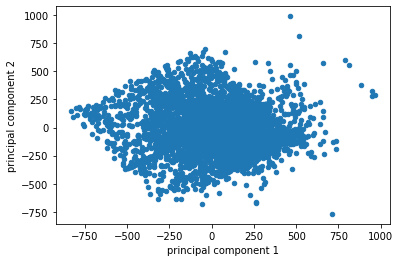

In [39]:
av=principalDf["principal component 1"]
bv=principalDf["principal component 2"]



principalDf.plot(kind='scatter', x="principal component 1", y="principal component 2")


In [395]:
#  import matplotlib.pyplot as plt

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = ["Henry Cejudo","Marlon Moraes"]
# colors = ['r','b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf[["R_fighter","B_fighter"]] == target
#     ax.scatter(finalDf.loc[indicesToKeep, result_Henry_Cejudo["principal component 1"]]
#                , finalDf.loc[indicesToKeep, result_Marlon_Moraes["principal component 1"]]
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()